GitHub [link](https://github.com/MYUSER/MYPROJECT/)!

Welcome to your assignment this week! 


# Classification task

In this task you are asked to build a simple Feed Forward Neural Network, train it and test it!


**After this assignment you will be able to:**

- Load a dataset.
- Train a Feed Forward Neural Network.
- Test a Feed Forward Neural Network.

Let's get started! Run the following cell to install all the packages you will need.

In [ ]:
#!pip install numpy
#!pip install keras
#!pip install tensorflow
#!pip install pandas
#!pip install matplotlib

Run the following cell to load the packages you will need.

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

The dataset we will use consists of 4500 examples with 512 features. A label is given for each example to indicate positive and negative instances.

Let's read the data.

In [22]:
df = pd.read_csv('data.csv')
df.set_index('id', inplace=True)

Now, let's split the data into training and test sets.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df.index.values,
    df.label.values,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)
df['data_type'] = ['note_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_test, 'data_type'] = 'test'

## The data to use:

X_train = df[df['data_type']=='train'].iloc[:,:512].values
X_test = df[df['data_type']=='test'].iloc[:,:512].values
y_train = df[df['data_type']=='train'].iloc[:,512:513].values
y_test = df[df['data_type']=='test'].iloc[:,512:513].values

# Task 1

Build a Feed Forward Neural Network to address this classification task using the Keras framework.

In [24]:
model = Sequential()
model.add(Dense(1, input_dim=512, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 513       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


# Training

Now, let's start our training.

In [25]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, verbose=1)

Epoch 1/200
60/60 [==============================] - 0s 642us/step - loss: 0.5751 - accuracy: 0.7098
Epoch 2/200
60/60 [==============================] - 0s 572us/step - loss: 0.3836 - accuracy: 0.8384
Epoch 3/200
60/60 [==============================] - 0s 620us/step - loss: 0.3048 - accuracy: 0.8708
Epoch 4/200
60/60 [==============================] - 0s 655us/step - loss: 0.2574 - accuracy: 0.8957
Epoch 5/200
60/60 [==============================] - 0s 628us/step - loss: 0.2236 - accuracy: 0.9111
Epoch 6/200
60/60 [==============================] - 0s 587us/step - loss: 0.1987 - accuracy: 0.9258
Epoch 7/200
60/60 [==============================] - 0s 613us/step - loss: 0.1794 - accuracy: 0.9365
Epoch 8/200
60/60 [==============================] - 0s 670us/step - loss: 0.1636 - accuracy: 0.9451
Epoch 9/200
60/60 [==============================] - 0s 653us/step - loss: 0.1507 - accuracy: 0.9516
Epoch 10/200
60/60 [==============================] - 0s 603us/step - loss: 0.1397 - accura

60/60 [==============================] - 0s 645us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 161/200
60/60 [==============================] - 0s 653us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 162/200
60/60 [==============================] - 0s 595us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 163/200
60/60 [==============================] - 0s 605us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 164/200
60/60 [==============================] - 0s 612us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 165/200
60/60 [==============================] - 0s 595us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 166/200
60/60 [==============================] - 0s 587us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 167/200
60/60 [==============================] - 0s 587us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 168/200
60/60 [==============================] - 0s 589us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 169/200
60/60 [==============================] - 0s 579us/step - loss: 0.0025 - a

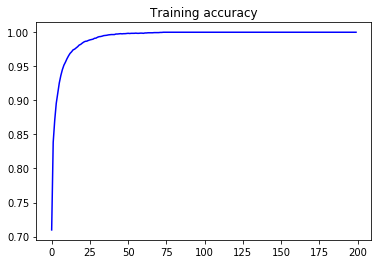

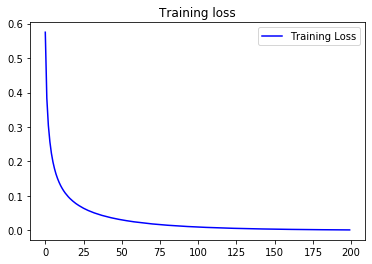

In [26]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

# Task 2

Test the model on the test set.

In [27]:
results = model.evaluate(X_test, y_test, batch_size=128)
#reference https://www.tensorflow.org/guide/keras/train_and_evaluate

6/6 [==============================] - 0s 661us/step - loss: 0.0661 - accuracy: 0.9748


# Congratulations!

You've come to the end of this assignment, and you have built your first neural network. 

Congratulations on finishing this notebook! 

